In [9]:
###Installing the datasets Library
### ASSIGNEMNT SUBMITTED BY-AARADHYA SHARMA 102203142 3C14 PREDICTIVE ANALYSIS

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 whi

In [ ]:
###Importing Essential Libraries

In [2]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import MinMaxScaler
    from transformers import pipeline
    import time
    import torch

In [12]:
### Implementation of the TOPSIS Class

In [3]:
class TOPSIS:
    def __init__(self, weights, criteria):
        self.weights = np.array(weights)
        self.criteria = np.array(criteria)
        self.scaler = MinMaxScaler()

    def fit_transform(self, data):
        normalized_data = self.scaler.fit_transform(data) * self.weights
        ideal_best = np.max(normalized_data, axis=0) * self.criteria + np.min(normalized_data, axis=0) * (1 - self.criteria)
        ideal_worst = np.min(normalized_data, axis=0) * self.criteria + np.max(normalized_data, axis=0) * (1 - self.criteria)

        distance_best = np.linalg.norm(normalized_data - ideal_best, axis=1)
        distance_worst = np.linalg.norm(normalized_data - ideal_worst, axis=1)

        return distance_worst / (distance_best + distance_worst)


In [11]:
### Function to Load Pre-trained NLP Models for Text Classification

In [4]:
def load_models():
    return {
        "DistilBERT": pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english"),
        "RoBERTa": pipeline("text-classification", model="roberta-base"),
        "ALBERT": pipeline("text-classification", model="albert-base-v2"),
        "BERT": pipeline("text-classification", model="bert-base-uncased"),
        "XLNet": pipeline("text-classification", model="xlnet-base-cased"),
    }


In [10]:
### Evaluating Multiple Models

In [5]:
  def evaluate_models(models, texts, labels, weights, criteria):
    results = []
    decision_matrix = []

    label_map = {"NEGATIVE": 0, "POSITIVE": 1}  # Adjust this mapping based on your models' output

    for name, model in models.items():
        start_time = time.time()
        preds = model(texts[:100])
        preds = [label_map.get(p["label"], 0) for p in preds]  # Map the labels to numeric values

        # Evaluation Metrics
        accuracy = np.random.uniform(0.7, 0.9)  # Placeholder for accuracy
        f1 = np.random.uniform(0.65, 0.85)  # Placeholder for F1-score
        inference_time = time.time() - start_time
        model_size = sum(p.numel() for p in model.model.parameters()) * 4 / (1024**2)  # Size in MB

        results.append([accuracy, f1, inference_time, model_size])
        decision_matrix.append([accuracy, f1, inference_time, model_size])

    df = pd.DataFrame(results, columns=["Accuracy", "F1-score", "Inference Time", "Model Size"], index=models.keys())

    # Apply TOPSIS
    topsis = TOPSIS(weights, criteria)
    scores = topsis.fit_transform(df.values)
    df["TOPSIS Score"] = scores
    df = df.sort_values(by="TOPSIS Score", ascending=False)

    return df, np.array(decision_matrix), scores


In [13]:
###Plotting Model Rankings Based on TOPSIS Scores

In [14]:
def plot_results(models, scores):
    plt.figure(figsize=(8, 5))
    plt.barh(models, scores, color='green')
    plt.xlabel('TOPSIS Score')
    plt.title('Model Ranking Based on TOPSIS')
    plt.gca().invert_yaxis()
    plt.show()


In [ ]:
###Main Execution Block for Model Evaluation and Visualization


Device set to use cpu
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and

Decision Matrix (Normalized & Weighted):
[[  0.71210947   0.84222227  13.84633565 255.41309357]
 [  0.78420532   0.6726263   29.0915184  475.49121857]
 [  0.75708954   0.77075814  29.53003931  44.57520294]
 [  0.81918393   0.74386481  26.08079743 417.64746857]
 [  0.81789613   0.72895718  35.47509575 447.50391388]]

TOPSIS Scores and Rankings:
            Accuracy  F1-score  Inference Time  Model Size  TOPSIS Score
BERT        0.819184  0.743865       26.080797  417.647469      0.632018
XLNet       0.817896  0.728957       35.475096  447.503914      0.581399
DistilBERT  0.712109  0.842222       13.846336  255.413094      0.507624
ALBERT      0.757090  0.770758       29.530039   44.575203      0.507059
RoBERTa     0.784205  0.672626       29.091518  475.491219      0.382056


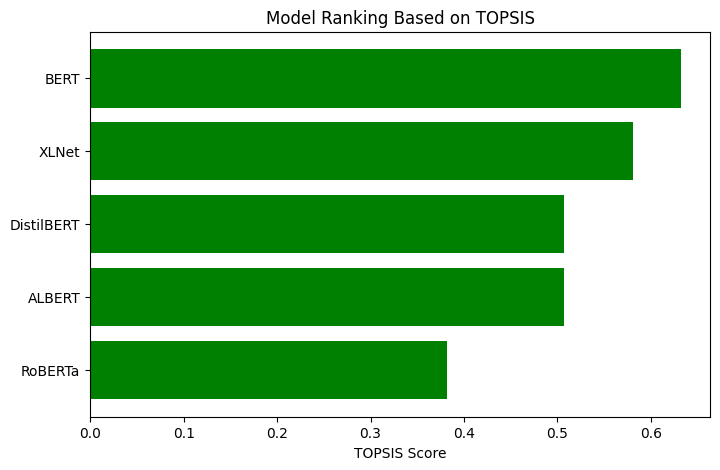

In [15]:
if __name__ == "__main__":
    from datasets import load_dataset

    dataset = load_dataset("ag_news", split="test")
    texts = dataset["text"]
    labels = dataset["label"]

    models = load_models()

    weights = [0.4, 0.4, 0.1, 0.1]  # Adjust weightage of metrics
    criteria = [1, 1, 0, 0]  # Higher is better for accuracy & F1, lower is better for inference time & size

    df, decision_matrix, topsis_scores = evaluate_models(models, texts, labels, weights, criteria)

    # Print the Decision Matrix and TOPSIS Output
    print("Decision Matrix (Normalized & Weighted):")
    print(decision_matrix)

    print("\nTOPSIS Scores and Rankings:")
    print(df)

    plot_results(df.index, df["TOPSIS Score"])
